## Nonlinear numerical schemes using specular differentiation for initial value problems for first-order ordinary differential equations

In [8]:
import specular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tools import compute_ratios, save_table_to_txt, error_analysis

### Figure 1

Running specular trigonometric scheme: 100%|██████████| 24/24 [00:00<?, ?it/s]


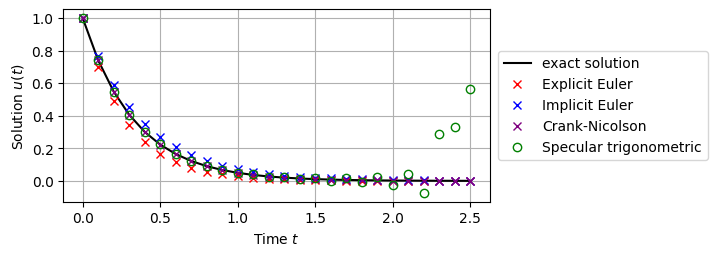

In [9]:
t_0 = 0.0
T = 2.5
h = 0.1

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

u_1 = exact_sol(t_0 + h)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").values()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="implicit Euler").values()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="Crank-Nicolson").values()
result_ST = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=u_1, T=T, h=h).values()

exact_solution = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(5.5, 2.5))
           
plt.plot(result_EE[0], exact_solution, color='black', label='exact solution') 

plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None',
         markerfacecolor='none', 
         markeredgecolor='red',  
         label='Explicit Euler') 

plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='Implicit Euler')  

plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',
         label='Crank-Nicolson')  

plt.plot(result_ST[0], result_ST[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='Specular trigonometric')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.show()


### Figure 2

Running specular trigonometric scheme: 100%|██████████| 19/19 [00:00<?, ?it/s]


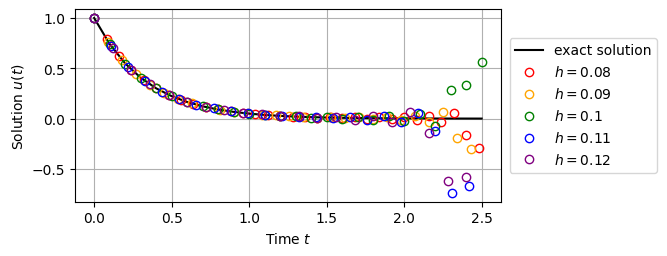

In [10]:
t_0 = 0.0
T = 2.5
max_iter = 1000

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

result_ST_08 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.08), T=T, h=0.08).values()
result_ST_09 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.09), T=T, h=0.09).values()
result_ST_10 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.10), T=T, h=0.1).values()
result_ST_11 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.11), T=T, h=0.11).values()
result_ST_12 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.12), T=T, h=0.12).values()

exact_solution = np.array([exact_sol(t) for t in result_ST_10[0]])

plt.figure(figsize=(5.5, 2.5))
           
plt.plot(result_ST_10[0], exact_solution, color='black', label='exact solution') 

plt.plot(result_ST_08[0], result_ST_08[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='red',  
         label='$h = 0.08$')

plt.plot(result_ST_09[0], result_ST_09[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='orange',  
         label='$h = 0.09$')

plt.plot(result_ST_10[0], result_ST_10[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='$h = 0.1$')

plt.plot(result_ST_11[0], result_ST_11[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='$h = 0.11$')

plt.plot(result_ST_12[0], result_ST_12[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',  
         label='$h = 0.12$')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.show()

### Figure 3

Running specular trigonometric scheme: 100%|██████████| 199/199 [00:00<?, ?it/s]


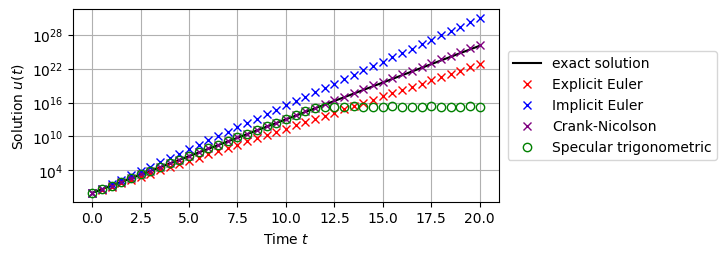

In [11]:
t_0 = 0.0
T = 20.0
h = 0.1

def F(t, u):
    return 3*u 

def exact_sol(t):
    return np.exp(3*t)

def u_0(t_0):
    return exact_sol(t_0)

u_1 = exact_sol(t_0 + h)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").values()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="implicit Euler").values()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="Crank-Nicolson").values()
result_ST = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=u_1, T=T, h=h).values()


exact_solution = np.array([exact_sol(t) for t in result_EE[0]])

visual_percentage = 0.2
step = max(1, int(len(result_EE[0]) / (len(result_EE[0]) * visual_percentage)))

plt.figure(figsize=(5.5, 2.5))
           
plt.plot(result_EE[0][::step], exact_solution[::step], color='black', label='exact solution') 

plt.plot(result_EE[0][::step], result_EE[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none', 
         markeredgecolor='red',  
         label='Explicit Euler') 

plt.plot(result_IE[0][::step], result_IE[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='Implicit Euler')  

plt.plot(result_CN[0][::step], result_CN[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',
         label='Crank-Nicolson')  

plt.plot(result_ST[0][::step], result_ST[1][::step],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='Specular trigonometric')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.grid(True)
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.show()

### Figure 4

Running the specular Euler scheme of Type 6: 100%|██████████| 25/25 [00:00<00:00, 25001.81it/s]


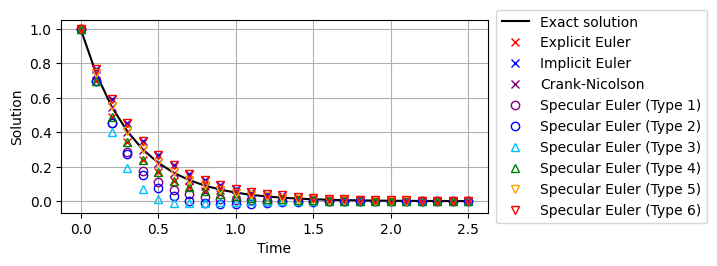

In [12]:
t_0 = 0.0
T = 2.5
h = 0.1
max_iter = 1000

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").values()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="implicit Euler").values()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="Crank-Nicolson").values()

exact_values = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(5.5, 2.5))

plt.plot(result_EE[0], exact_values, color='black', label='Exact solution')

plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='red', label='Explicit Euler') 

plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='blue', label='Implicit Euler')  

plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='purple', label='Crank-Nicolson')  

colors = ['purple', 'blue', 'deepskyblue', 'green', 'orange', 'red']
markers = ['o', 'o', '^', '^', 'v', 'v']

for i in range(1, 7):
    result = specular.Euler_scheme(of_Type=i, F=F, t_0=t_0, u_0=u_0, T=T, h=h).values()
    number_of_circles = max(1, len(result[0]) // 30)
    plt.plot(result[0], result[1], marker=markers[i-1], linestyle='None', markeredgecolor=colors[i-1], markerfacecolor='none', label=f'Specular Euler (Type {i})')

plt.xlabel(r"Time", fontsize=10)
plt.ylabel(r"Solution", fontsize=10)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.show()

### Figure 5

Running the specular Euler scheme of Type 6: 100%|██████████| 90/90 [00:00<00:00, 89920.76it/s]


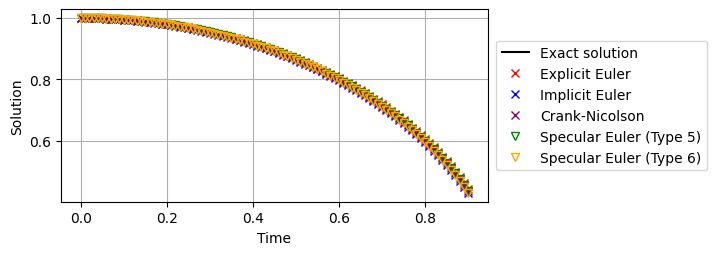

In [13]:
t_0 = 0.0
T = 0.9
h = 0.01
max_iter = 1000

def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)
    
def u_0(t_0):
    return exact_sol(t_0)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").values()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="implicit Euler").values()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="Crank-Nicolson").values()

exact_values = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(5.5, 2.5))

plt.plot(result_EE[0], exact_values, color='black', label='Exact solution')

plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='red', label='Explicit Euler') 

plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='blue', label='Implicit Euler')  

plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='purple', label='Crank-Nicolson')  

colors = ['green', 'orange']
markers = ['v', 'v']

for i in range(1, 3):
    result = specular.Euler_scheme(of_Type=i+4, F=F, t_0=t_0, u_0=u_0, T=T, h=h).values()
    number_of_circles = max(1, len(result[0]) // 30)
    plt.plot(result[0], result[1], marker=markers[i-1], linestyle='None', markeredgecolor=colors[i-1], markerfacecolor='none', label=f'Specular Euler (Type {i+4})')

plt.xlabel(r"Time", fontsize=10)
plt.ylabel(r"Solution", fontsize=10)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.show()

### Figure 6

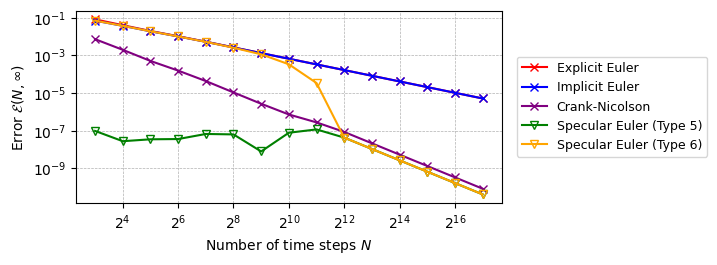

In [14]:
def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)

error_analysis(example=1, norm='max', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

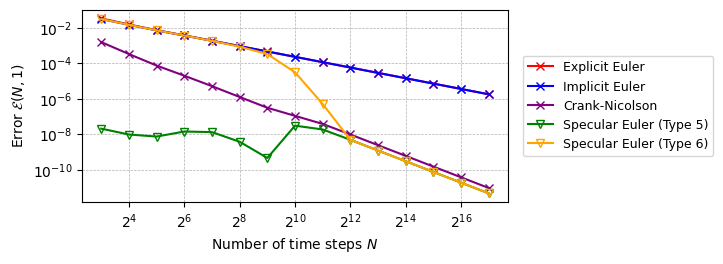

In [15]:
error_analysis(example=1, norm='l1', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

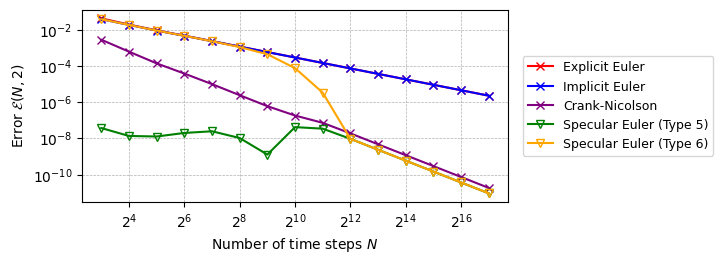

In [16]:
error_analysis(example=1, norm='l2', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

### Figure 7

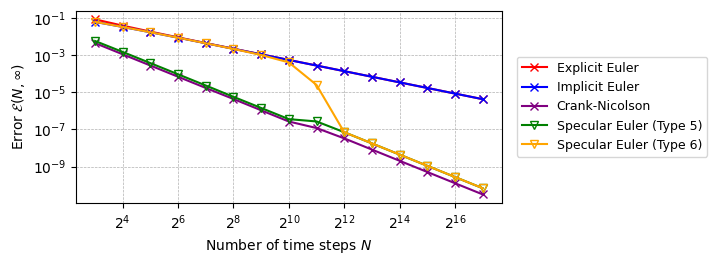

In [17]:
def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

error_analysis(example=2, norm='max', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

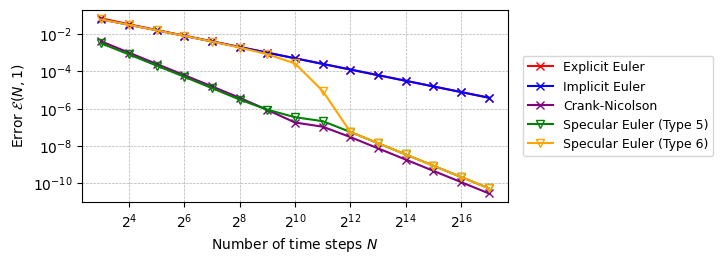

In [18]:
error_analysis(example=2, norm='l1', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

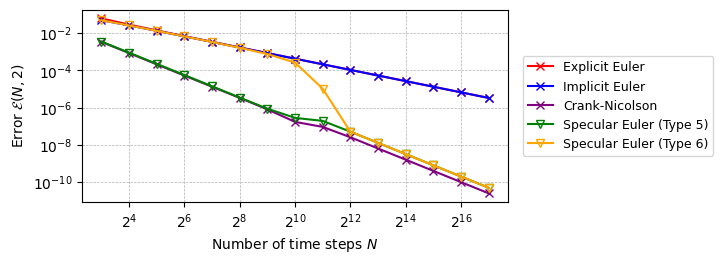

In [19]:
error_analysis(example=2, norm='l2', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

### Figure 9

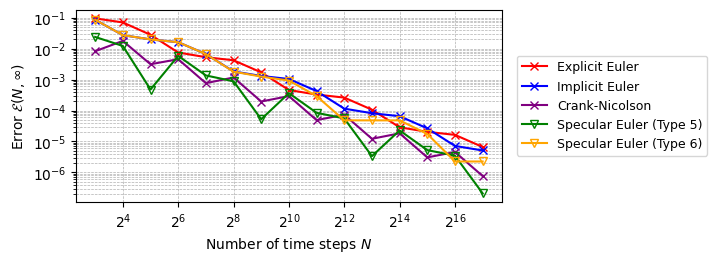

In [20]:
c = 0.3

def F(t, u):
    if t < 0:
        return -3*u 
    elif t > 0:
        return -3*u + 3*t + 1
    elif t == 0 and c == 1/6:
        return 1/2
    elif t == 0 and c != 1/6:
        return specular.A(1 - 3*c, -3*c) + 3*c
    
def exact_sol(t):
    t = np.asarray(t)
    return np.where(
        t < 0,
        c * np.exp(-3 * t),
        t + c * np.exp(-3 * t)
    )

error_analysis(example=3, norm='max', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)

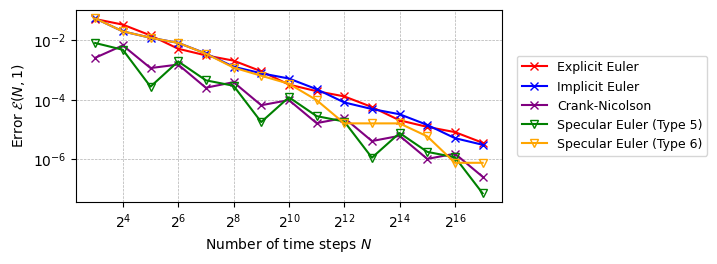

In [21]:
error_analysis(example=3, norm='l1', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)

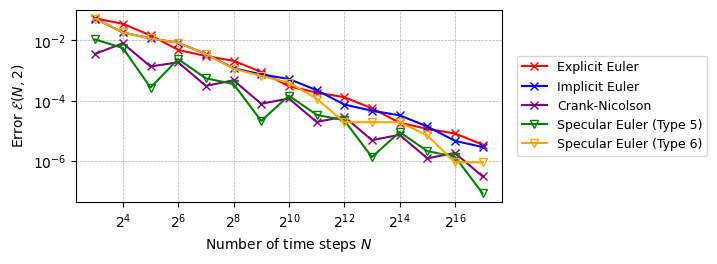

In [22]:
error_analysis(example=3, norm='l2', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)